<a href="https://colab.research.google.com/github/FarrelAD/Calculate-Subsidy-With-Fuzzy-Logic/blob/main/mamdani/mamdani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
!pip install scikit-fuzzy

In [69]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import matplotlib.pyplot as plt

In [70]:
# Define fuzzy variables
land_area = ctrl.Antecedent(np.arange(0, 5, 0.1), 'land_area')
rice_production = ctrl.Antecedent(np.arange(2, 7, 0.1), 'rice_production')
subsidy = ctrl.Consequent(np.arange(1, 6, 0.1), 'subsidy')

In [81]:
# Define fuzzy membership functions
land_area['small'] = fuzz.trimf(land_area.universe, [0, 0, 2])
land_area['medium'] = fuzz.trimf(land_area.universe, [0, 2, 4])
land_area['large'] = fuzz.trimf(land_area.universe, [2, 4, 4])

rice_production['low'] = fuzz.trimf(rice_production.universe, [2, 2, 4])
rice_production['medium'] = fuzz.trimf(rice_production.universe, [2, 4, 6])
rice_production['high'] = fuzz.trimf(rice_production.universe, [4, 6, 6])

subsidy['low'] = fuzz.trimf(subsidy.universe, [1, 1, 3])
subsidy['medium'] = fuzz.trimf(subsidy.universe, [1, 3, 5])
subsidy['high'] = fuzz.trimf(subsidy.universe, [3, 5, 5])

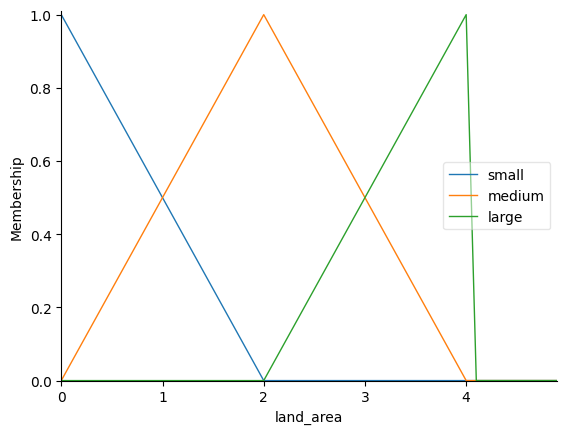

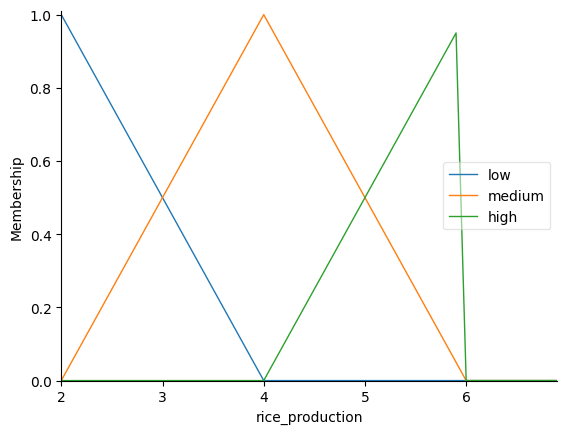

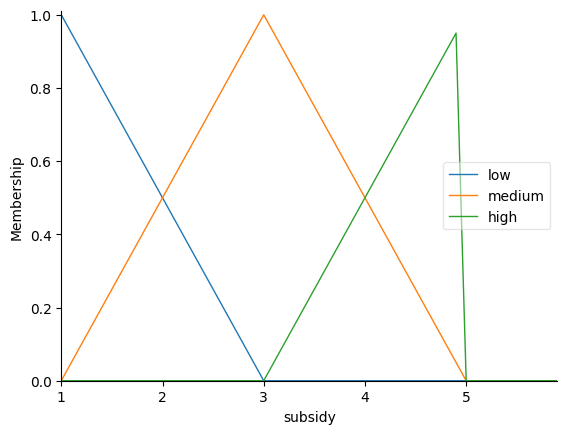

In [82]:
land_area.view()
rice_production.view()
subsidy.view()

In [83]:
# Define fuzzy rules
rule1 = ctrl.Rule(land_area['small'] & rice_production['low'], subsidy['high'])
rule2 = ctrl.Rule(land_area['small'] & rice_production['medium'], subsidy['medium'])
rule3 = ctrl.Rule(land_area['small'] & rice_production['high'], subsidy['low'])
rule4 = ctrl.Rule(land_area['medium'] & rice_production['low'], subsidy['high'])
rule5 = ctrl.Rule(land_area['medium'] & rice_production['medium'], subsidy['medium'])
rule6 = ctrl.Rule(land_area['medium'] & rice_production['high'], subsidy['low'])
rule7 = ctrl.Rule(land_area['large'] & rice_production['low'], subsidy['medium'])
rule8 = ctrl.Rule(land_area['large'] & rice_production['medium'], subsidy['low'])
rule9 = ctrl.Rule(land_area['large'] & rice_production['high'], subsidy['low'])

In [84]:
# Create control system
subsidy_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
subsidization = ctrl.ControlSystemSimulation(subsidy_ctrl)

In [85]:
# Input values
subsidization.input['land_area'] = 3.2
subsidization.input['rice_production'] = 5

In [86]:
# Compute the result
subsidization.compute()

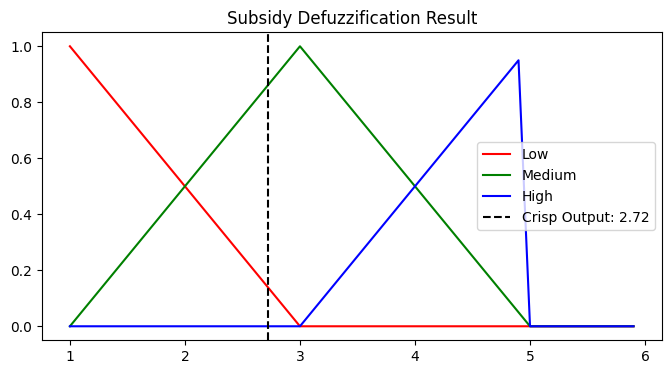

In [87]:
# Visualizing defuzzification process
subsidy_activation = subsidization.output['subsidy']

# Plotting the output fuzzy set with crisp result
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(subsidy.universe, subsidy['low'].mf, 'r', label='Low')
ax.plot(subsidy.universe, subsidy['medium'].mf, 'g', label='Medium')
ax.plot(subsidy.universe, subsidy['high'].mf, 'b', label='High')
ax.axvline(x=subsidy_activation, color='k', linestyle='--', label=f"Crisp Output: {subsidy_activation:.2f}")
ax.set_title('Subsidy Defuzzification Result')
ax.legend()
plt.show()